# Análise de Implantação de Centros de Distribuição
- Objetivo: Encontrar o número de centros de distribuição ideal para atender a todas as lojas com eficiência

## Pacotes utilizados

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.cluster import KMeans

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Auxiliares
import os

os.chdir(os.getcwd().replace('notebooks', ''))

## Análise exploratória dos dados

In [2]:
# Importação do csv
df = pd.read_csv(
    os.path.join('dados', 'Fiap On - Fase 6 - Geolocalização Dataset - Asset.csv'),
    decimal = ','
)
df.head()

,latitude,longitude,price
0,-21.59136,-51.06669,52.47
1,-21.28535,-49.65497,37.03
2,-22.02590,-47.06702,71.50
3,-21.91623,-46.68666,88.27
4,-22.47639,-46.63278,36.16


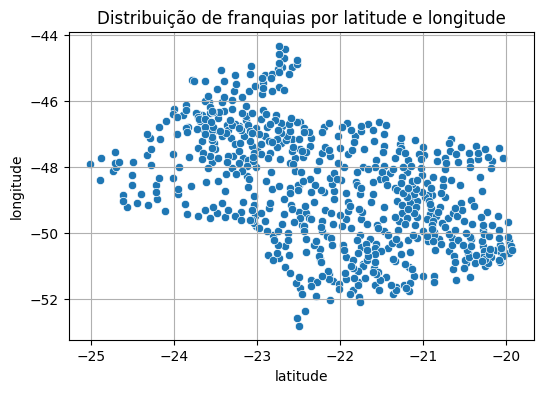

In [3]:
plt.figure(figsize = (6, 4))
sns.scatterplot(
    x = 'latitude',
    y = 'longitude',
    data = df
)
plt.grid()
plt.title('Distribuição de franquias por latitude e longitude', fontsize = 12)
plt.show()

## Análise de clusters com Kmeans

In [4]:
# Listas para armazenar os resultados
inercia_list = []
clusters_list = []

# Loop sobre diferentes quantidades de clusters
for n_clusters in range(1, 11):

    # Definir e treinar o modelo KMeans
    kmeans = KMeans(n_clusters = n_clusters, random_state = 78)
    kmeans.fit(df.drop(columns = 'price'))
    
    # Salvar as métricas
    inercia_list.append(kmeans.inertia_)
    clusters_list.append(n_clusters)

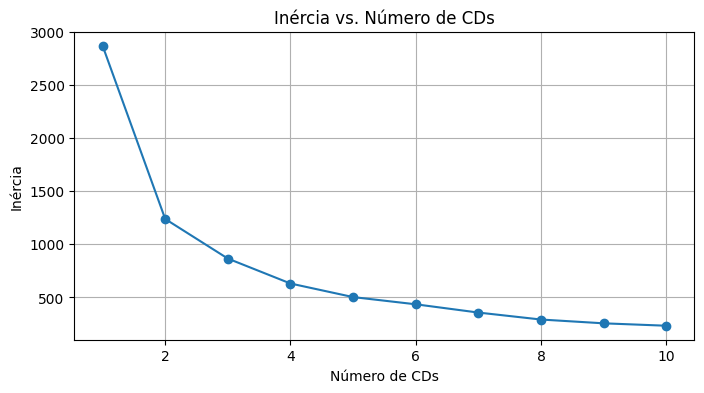

In [5]:
# Plotar o gráfico de inércia vs. número de clusters
plt.figure(figsize=(8, 4))
plt.plot(clusters_list, inercia_list, marker='o')
plt.title('Inércia vs. Número de CDs')
plt.xlabel('Número de CDs')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

Pela análise do gráfico, podemos concluir que com 4 centros de distribuição é possível chegar em um resultado satisfatório, já que não é observado uma grande redução de distância média com valores superiores a este.

## Análise dos grupos formados

### Formando os 4 grupos

In [6]:
# Treinando Kmeans com 4 clusters
kmeans = KMeans(n_clusters = 4, random_state = 78)
kmeans.fit(df.drop(columns = 'price'))

KMeans(n_clusters=4, random_state=78)

In [7]:
# Definindo grupos na base de dados
df['centro_distribuicao'] = kmeans.predict(df[['latitude', 'longitude']])
df['centro_distribuicao'] = df['centro_distribuicao'].map({
    0 : 'Centro 1', 1 : 'Centro 2',
    2 : 'Centro 3', 3 : 'Centro 4'
})

df.head()

,latitude,longitude,price,centro_distribuicao
0,-21.59136,-51.06669,52.47,Centro 1
1,-21.28535,-49.65497,37.03,Centro 1
2,-22.02590,-47.06702,71.50,Centro 3
3,-21.91623,-46.68666,88.27,Centro 3
4,-22.47639,-46.63278,36.16,Centro 3


### Posição dos centros

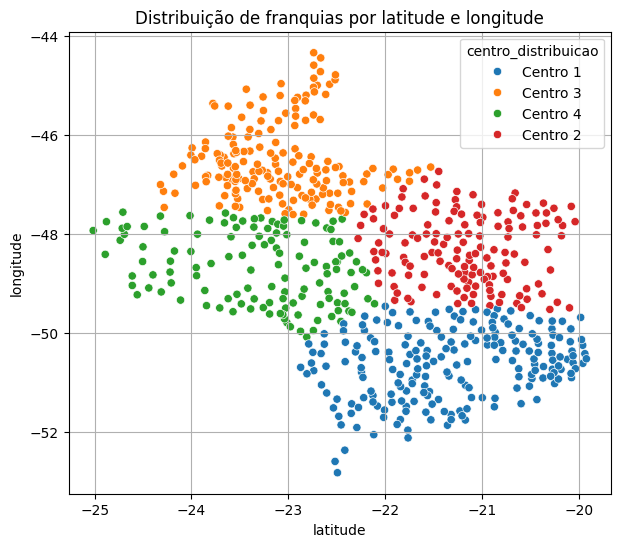

In [8]:
plt.figure(figsize = (7, 6))
sns.scatterplot(
    x = 'latitude',
    y = 'longitude',
    hue = 'centro_distribuicao',
    data = df
)
plt.grid()
plt.title('Distribuição de franquias por latitude e longitude', fontsize = 12)
plt.show()

### Desempenho dos centros de distribuição

In [16]:
df.groupby('centro_distribuicao').agg('sum')

,latitude,longitude,price
centro_distribuicao,,,
Centro 1,-4415.63738,-10481.96956,12838.25
Centro 2,-3070.00955,-7003.93183,9440.39
Centro 3,-4043.41570,-8139.31568,11067.97
Centro 4,-2935.61372,-6134.10491,7837.20


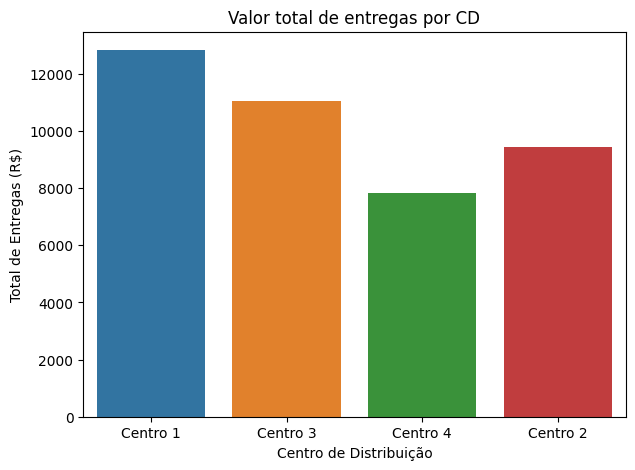

In [18]:
# Plotando gráfico de desempenho
plt.figure(figsize = (7, 5))
sns.barplot(
    y = 'price',
    x = 'centro_distribuicao',
    data = df,
    errorbar = None,
    hue = 'centro_distribuicao',
    estimator = 'sum'
)
plt.title('Valor total de entregas por CD', fontsize = 12)
plt.xlabel('Centro de Distribuição')
plt.ylabel('Total de Entregas (R$)')
plt.show()